# ***Proyecto de curso***


# ***Explicación breve del análisis***

1. En este análisis, se trabaja con la base de datos de una empresa de Telecomunicación en Perú, donde se presentan datos de los 31 días del mes de octubre del año 2021, en ella, se aprecian Ingresos, Costos, Marcas, Gamas, Tipos de equipo, así como Tipos de Ventas, Cadenas o Canales de venta, así como el Departamento donde se ejecutó dicho movimiento.


2. Una vez ejecutado el ambiente de trabajo y cargada la base de datos, se procedió a realizar el derrotero exigido, haciendo los procesos debidos mediante se avanzaba en la misma solicitud, transformaciones que fueron requeridas se realizaron procurando afectar lo menos posible la base de datos original.



In [197]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
#from google.colab import drive
#drive.mount('/content/drive')

In [199]:
#df=pd.read_excel("/content/drive/MyDrive/BOOTCAMP/Colab Notebooks/trabajo final/1. Base_proyecto.xlsx")

df=pd.read_excel("/content/1. Base_proyecto.xlsx")
df.head(5)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Precio,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,NaN,173.03390,192.39,NaN,NaN,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,NaN,355.22030,338.88,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,NaN,725.38980,769.94,NaN,NaN,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,56.23729,35.41,NaN,NaN,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,NaN,49.70339,34.85,NaN,NaN,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A


# **Nivel Básico**

## 1.- Haga una descripción general de los Datos.




In [201]:
print(f'Nro de obs: {df.shape[0]}')
print(f'Nro de variables: {df.shape[1]}')

Nro de obs: 19552
Nro de variables: 19


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19552 entries, 0 to 19551
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       19552 non-null  int64  
 1   Dia           19552 non-null  int64  
 2   EquipoSim     19552 non-null  object 
 3   Tipo          19552 non-null  object 
 4   Subtipo       19552 non-null  object 
 5   Marca         19552 non-null  object 
 6   Gama          19552 non-null  object 
 7   Precio        0 non-null      float64
 8   Ingreso       19552 non-null  float64
 9   Costo         19552 non-null  float64
 10  Margen        0 non-null      float64
 11  Rentabilidad  0 non-null      float64
 12  Tipo Venta    19552 non-null  object 
 13  CanalVenta    19551 non-null  object 
 14  CadenaDealer  16243 non-null  object 
 15  Departamento  19404 non-null  object 
 16  Canal         19552 non-null  object 
 17  SubCanal      19552 non-null  object 
 18  Cluster       19404 non-nu

In [203]:
print("Variables: \n")
print(df.dtypes)

Variables: 

Periodo           int64
Dia               int64
EquipoSim        object
Tipo             object
Subtipo          object
Marca            object
Gama             object
Precio          float64
Ingreso         float64
Costo           float64
Margen          float64
Rentabilidad    float64
Tipo Venta       object
CanalVenta       object
CadenaDealer     object
Departamento     object
Canal            object
SubCanal         object
Cluster          object
dtype: object


In [204]:
df.isnull().any()

Periodo         False
Dia             False
EquipoSim       False
Tipo            False
Subtipo         False
Marca           False
Gama            False
Precio           True
Ingreso         False
Costo           False
Margen           True
Rentabilidad     True
Tipo Venta      False
CanalVenta       True
CadenaDealer     True
Departamento     True
Canal           False
SubCanal        False
Cluster          True
dtype: bool

In [205]:
print("Variables con valores faltantes:\n")
print(df.isnull().sum())

Variables con valores faltantes:

Periodo             0
Dia                 0
EquipoSim           0
Tipo                0
Subtipo             0
Marca               0
Gama                0
Precio          19552
Ingreso             0
Costo               0
Margen          19552
Rentabilidad    19552
Tipo Venta          0
CanalVenta          1
CadenaDealer     3309
Departamento      148
Canal               0
SubCanal            0
Cluster           148
dtype: int64


## 2.- Realice estadísticas descriptivas para las variables que usted crea conveniente.

In [206]:
df[["Ingreso", "Costo"]].describe().round(1)

,Ingreso,Costo
count,19552.0,19552.0
mean,333.5,351.3
std,243.3,252.2
min,7.1,28.0
25%,141.7,157.1
50%,298.3,338.1
75%,471.8,540.4
max,4177.9,4271.6


# Nivel Intermedio

## 3.- Haga análisis de los Valores Faltantes.

In [207]:
print("Variables con valores faltantes:\n")
print(df.isnull().sum())

Variables con valores faltantes:

Periodo             0
Dia                 0
EquipoSim           0
Tipo                0
Subtipo             0
Marca               0
Gama                0
Precio          19552
Ingreso             0
Costo               0
Margen          19552
Rentabilidad    19552
Tipo Venta          0
CanalVenta          1
CadenaDealer     3309
Departamento      148
Canal               0
SubCanal            0
Cluster           148
dtype: int64


In [208]:
df = df.drop('Precio', axis = 1)

df['Margen'] = (df['Ingreso'] - df['Costo']).round(2)

df['Rentabilidad'] = ((df['Margen'] / df['Costo']) * 100).round(2)

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16221 entries, 0 to 19551
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Periodo       16221 non-null  int64  
 1   Dia           16221 non-null  int64  
 2   EquipoSim     16221 non-null  object 
 3   Tipo          16221 non-null  object 
 4   Subtipo       16221 non-null  object 
 5   Marca         16221 non-null  object 
 6   Gama          16221 non-null  object 
 7   Ingreso       16221 non-null  float64
 8   Costo         16221 non-null  float64
 9   Margen        16221 non-null  float64
 10  Rentabilidad  16221 non-null  float64
 11  Tipo Venta    16221 non-null  object 
 12  CanalVenta    16221 non-null  object 
 13  CadenaDealer  16221 non-null  object 
 14  Departamento  16221 non-null  object 
 15  Canal         16221 non-null  object 
 16  SubCanal      16221 non-null  object 
 17  Cluster       16221 non-null  object 
dtypes: float64(4), int64(2), object

In [209]:
print("Estadísticas descriptivas\n")
print("\nVariables numéricas\n", df[["Ingreso", "Costo","Margen","Rentabilidad"]].describe().round(1))
print("\nVariables categóricas\n", df[["Marca","Gama","Tipo Venta","CanalVenta","CadenaDealer","Departamento","Canal","SubCanal","Cluster"]].describe(include=[object]))

Estadísticas descriptivas


Variables numéricas
        Ingreso    Costo   Margen  Rentabilidad
count  16221.0  16221.0  16221.0       16221.0
mean     327.8    345.8    -18.0          10.6
std      242.1    254.2     71.3          66.8
min        7.1     28.0  -1379.9         -98.2
25%       77.6     53.8    -51.3         -12.2
50%      298.3    337.5    -12.4          -3.9
75%      465.3    513.2     21.6          24.8
max     4177.9   4271.6   1125.1        2389.4

Variables categóricas
           Marca    Gama Tipo Venta       CanalVenta CadenaDealer Departamento  \
count     16221   16221      16221            16221        16221        16221   
unique       15       5          3               10          467           24   
top     Bmobile  1. Low       Reno  GRANDES TIENDAS         ISLA         LIMA   
freq       4008    5637       7033            11483         1795         8385   

         Canal         SubCanal    Cluster  
count    16221            16221      16221  
unique  

## 4.- Visualice los gráficos que sean necesarios (5 gráficos como máximo)

Se revisaron varios pairplot donde se especificó mostrar por alguna variable categórica los datos, se pudo observar que, con Marca, Gama y Departamento, parecían haber grupos de datos distribuídos y agrupados



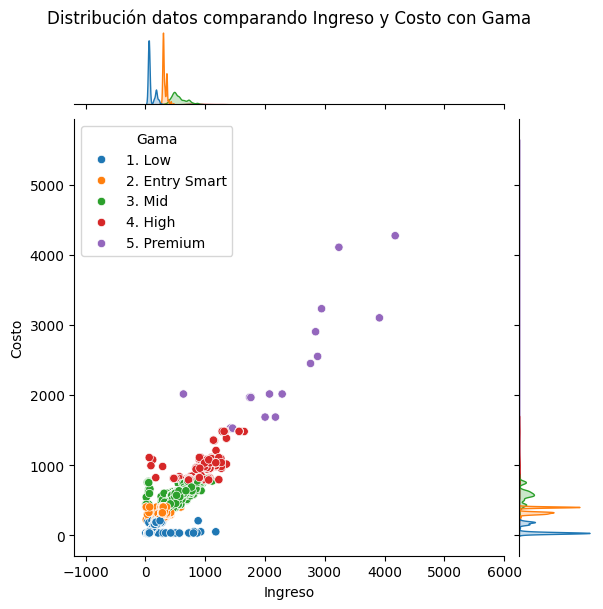

In [210]:
#Alexander
#Los gráficos pareados pueden dar información, o el que los pone todos contra todos

print("Se revisaron varios pairplot donde se especificó mostrar por alguna variable categórica los datos, se pudo observar que, con Marca, Gama y Departamento, parecían haber grupos de datos distribuídos y agrupados\n")

sns.jointplot(data=df,x='Ingreso',y='Costo',hue='Gama')
plt.title('Distribución datos comparando Ingreso y Costo con Gama', x=0.5, y=1.2)
plt.show()

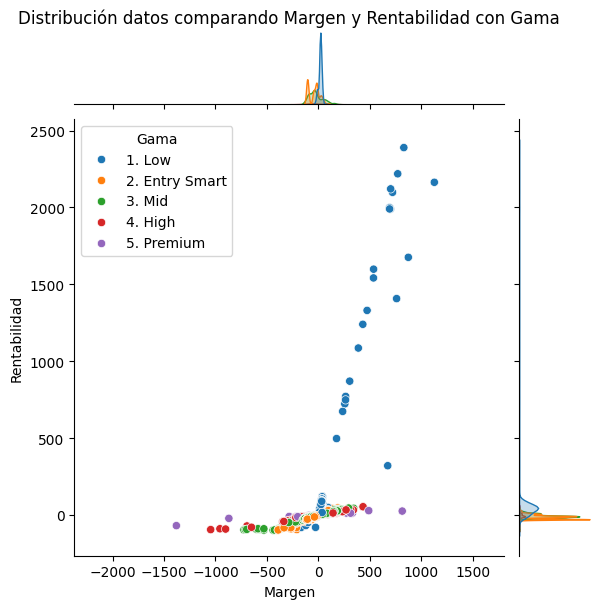

In [211]:
sns.jointplot(data=df,x='Margen',y='Rentabilidad',hue='Gama')
plt.title('Distribución datos comparando Margen y Rentabilidad con Gama', x=0.5, y=1.2)
plt.show()

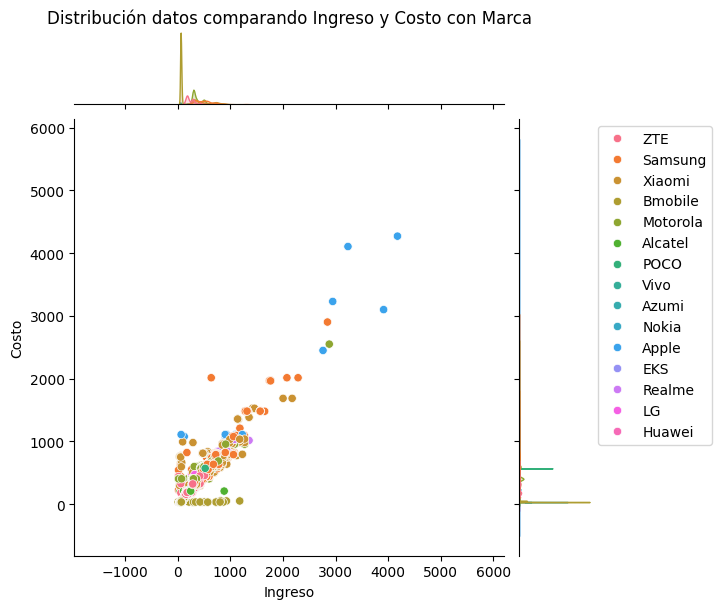

In [212]:
sns.jointplot(data=df,x='Ingreso',y='Costo',hue='Marca')
plt.title('Distribución datos comparando Ingreso y Costo con Marca', x=0.5, y=1.2)
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

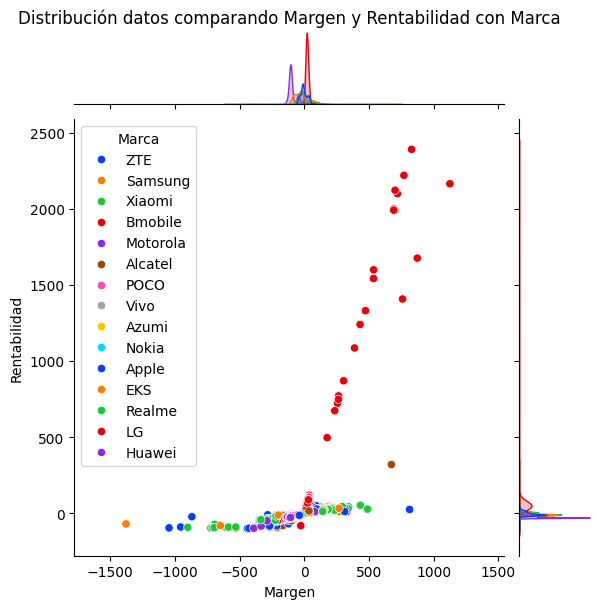

In [283]:
sns.jointplot(data=df,x='Margen',y='Rentabilidad',hue='Marca',palette="bright")
plt.title('Distribución datos comparando Margen y Rentabilidad con Marca', x=0.5, y=1.2)
plt.show()

In [290]:
ensayo1 = df.groupby('Marca')['Rentabilidad'].count().round(1)
ensayo1.sort_values()

Marca
Huawei         2
LG             7
Apple         26
EKS           40
Realme        43
Nokia         46
Azumi         54
Vivo         105
Alcatel      148
POCO         198
ZTE         2352
Xiaomi      2823
Samsung     2926
Motorola    3443
Bmobile     4008
Name: Costo, dtype: int64

In [293]:
ensayo2 = df.groupby('Marca')['Rentabilidad'].sum().round(1)
ensayo2.sort_values()

Marca
Motorola    -67947.1
Samsung     -12287.3
ZTE          -1111.7
POCO          -546.8
Alcatel       -410.6
Apple         -309.7
LG            -276.8
Huawei          27.6
Realme         110.4
Nokia          279.2
Vivo           293.8
Xiaomi        1527.8
EKS           1626.6
Azumi         3368.2
Bmobile     247689.9
Name: Rentabilidad, dtype: float64

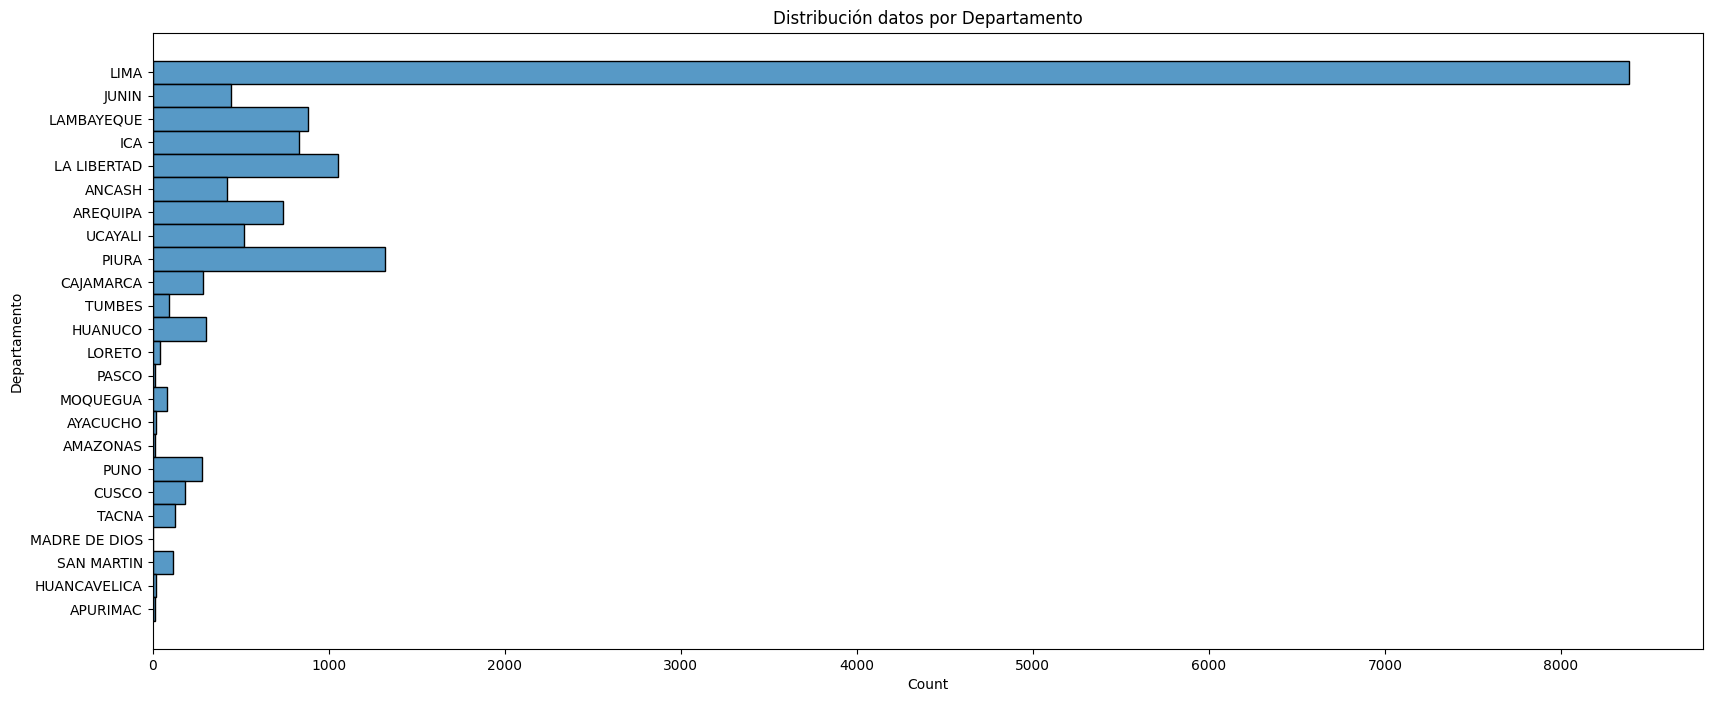

In [297]:
plt.figure(figsize=(20, 8))
sns.histplot(
    data=df,
    y='Departamento'
)
plt.title('Distribución datos por Departamento')
plt.show()

In [296]:
ensayo1 = df.groupby('Departamento')['Departamento'].count().round(1)
ensayo1.sort_values()

Departamento
MADRE DE DIOS       5
APURIMAC           15
AMAZONAS           16
PASCO              16
HUANCAVELICA       18
AYACUCHO           19
LORETO             42
MOQUEGUA           84
TUMBES             95
SAN MARTIN        119
TACNA             129
CUSCO             186
PUNO              282
CAJAMARCA         287
HUANUCO           306
ANCASH            423
JUNIN             448
UCAYALI           518
AREQUIPA          741
ICA               832
LAMBAYEQUE        884
LA LIBERTAD      1053
PIURA            1318
LIMA             8385
Name: Departamento, dtype: int64

## 5.- Realice un headmap con las variables que usted considere

In [214]:
df_heatmap=df[['Costo','Ingreso','Margen','Rentabilidad']]

df_heatmap.head(5)

,Costo,Ingreso,Margen,Rentabilidad
0,192.39,173.03390,-19.36,-10.06
1,338.88,355.22030,16.34,4.82
2,769.94,725.38980,-44.55,-5.79
3,35.41,56.23729,20.83,58.83
4,34.85,49.70339,14.85,42.61


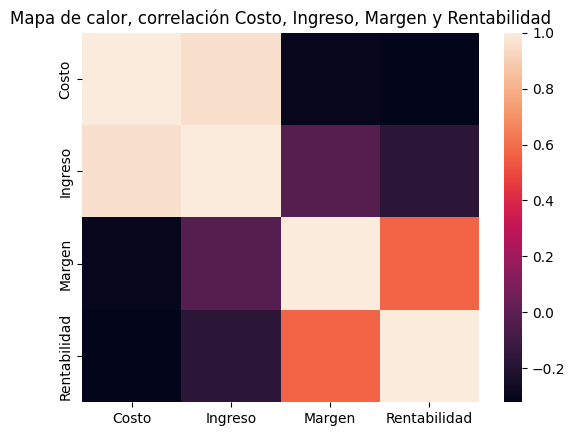

In [215]:
sns.heatmap(df_heatmap.corr())
plt.title('Mapa de calor, correlación Costo, Ingreso, Margen y Rentabilidad')
plt.show()

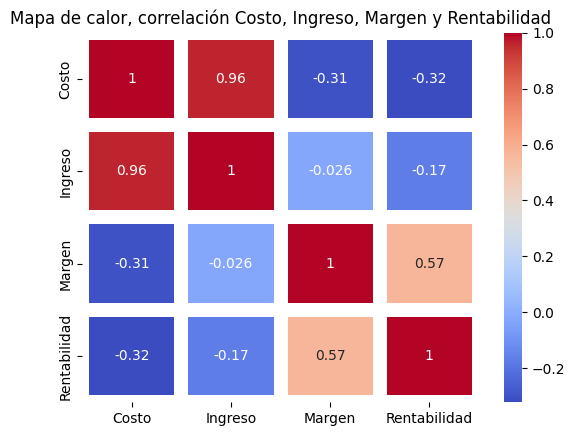

In [216]:
sns.heatmap(df_heatmap.corr(),
            annot=True,
            cmap='coolwarm',
            linewidths=10,cbar=True)
plt.title('Mapa de calor, correlación Costo, Ingreso, Margen y Rentabilidad')
plt.show()

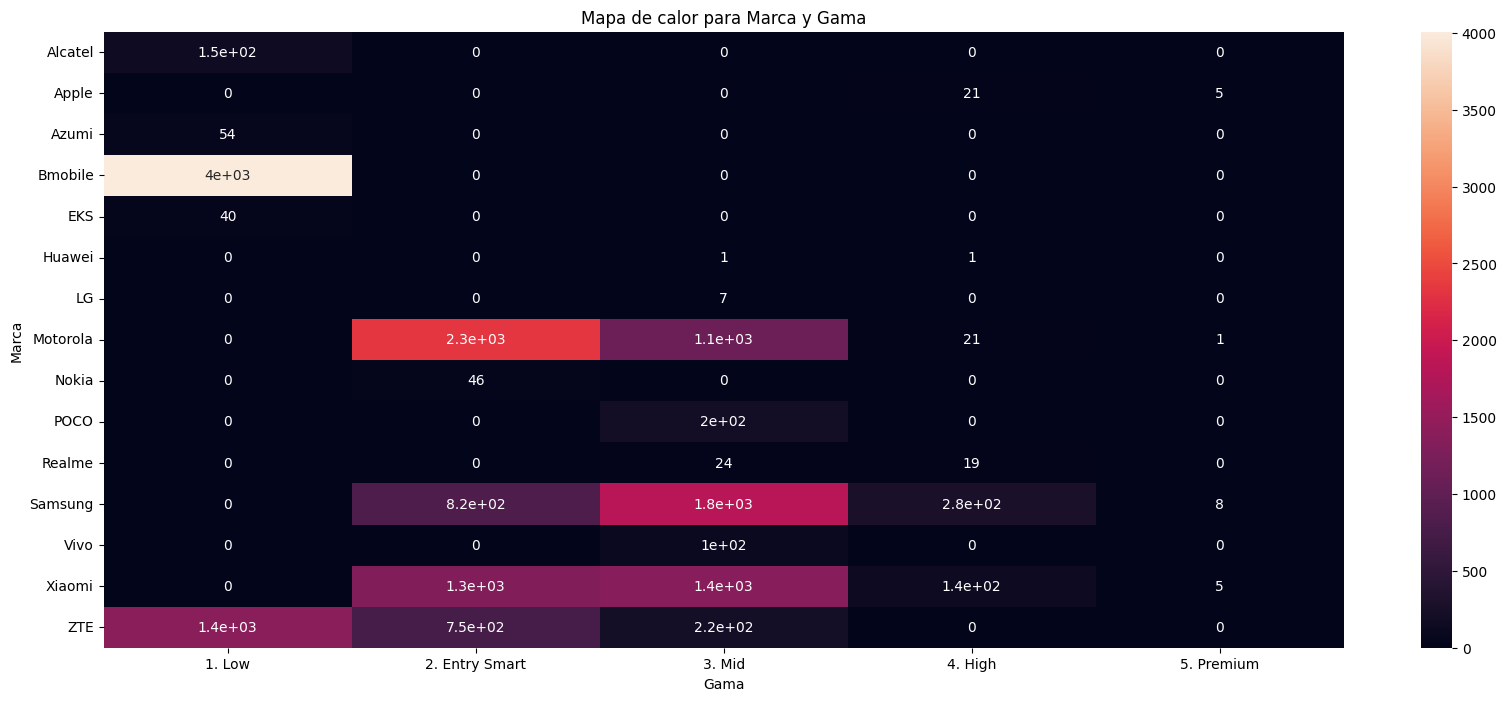

In [217]:
tabla1 = pd.crosstab(df['Marca'], df['Gama'])
plt.figure(figsize=(20, 8))
sns.heatmap(tabla1, annot=True)
plt.title('Mapa de calor para Marca y Gama')
plt.show()

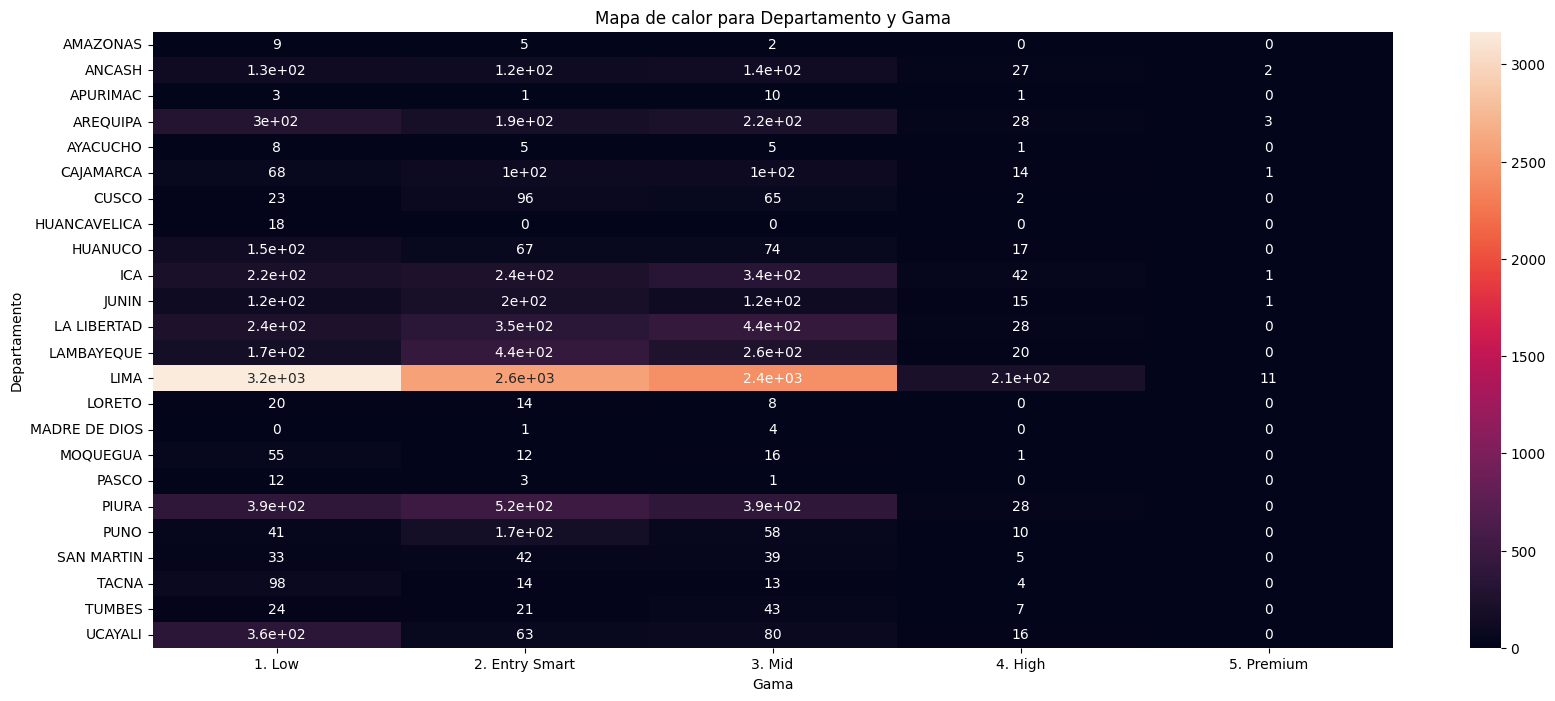

In [218]:
tabla2 = pd.crosstab(df['Departamento'], df['Gama'])
plt.figure(figsize=(20, 8))
sns.heatmap(tabla2, annot=True)
plt.title('Mapa de calor para Departamento y Gama')
plt.show()

# Nivel Data Analyst

## a. ¿Cuál es la distribución de la Marca de los equipos?

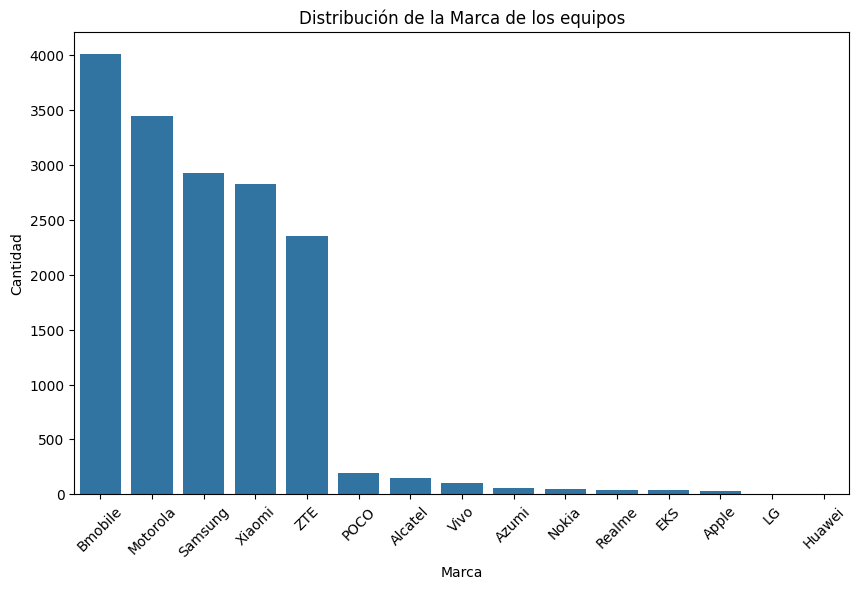

In [219]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marca', order=df['Marca'].value_counts().index)
plt.title('Distribución de la Marca de los equipos')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

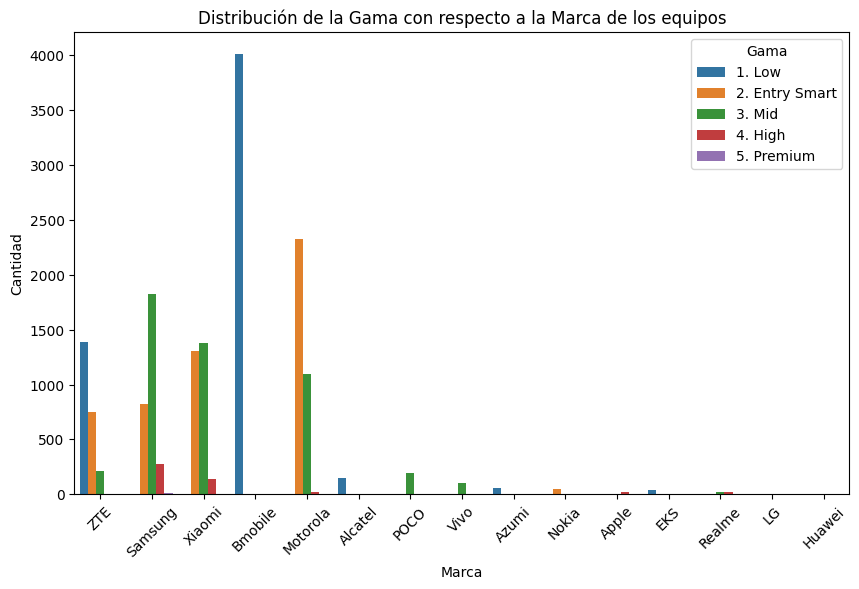

In [220]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Marca', hue='Gama')
plt.title('Distribución de la Gama con respecto a la Marca de los equipos')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Gama')
plt.show()

## b.¿Que Tipo Venta trae más ingresos, Porta o VR?
(Porta=Portabilidad | VR=VentaRegular)

In [221]:
ingresos_por_tipo_venta = df.groupby('Tipo Venta')['Ingreso'].sum().round(1)

print('Tipo Venta que trae más ingresos: ',ingresos_por_tipo_venta.idxmax())
print('Con un valor en Ingresos de: ',ingresos_por_tipo_venta.max())

Tipo Venta que trae más ingresos:  Porta
Con un valor en Ingresos de:  2365820.9


## c. ¿Qué marca tiene mejor margen en el Clúster B?

In [222]:
#TMP FILTRADO
df_ClusterB = df[df['Cluster'].isin(['Cluster B']) ]

#Margen:
#df_ClusterB['Margen'] = df_ClusterB['Ingreso'] - df_ClusterB['Costo']

df_ClusterB.head(10)

,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,355.22030,338.88,16.34,4.82,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,725.38980,769.94,-44.55,-5.79,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
5,202110,6,Equipo,Celular,Smartphone,Bmobile,1. Low,66.94915,34.81,32.14,92.33,VR,ISLAS,ISLA,LA LIBERTAD,ISLAS,ISLAS,Cluster B
7,202110,18,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,319.62710,337.70,-18.07,-5.35,Porta,GRANDES TIENDAS,PLAZAVEA,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
12,202110,8,Equipo,Celular,Smartphone,Motorola,3. Mid,497.59320,600.54,-102.95,-17.14,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B
15,202110,29,Equipo,Celular,Smartphone,Motorola,3. Mid,592.37290,600.04,-7.67,-1.28,VR,ISLAS,ISLA,AREQUIPA,ISLAS,ISLAS,Cluster B
19,202110,16,Equipo,Celular,Smartphone,Motorola,3. Mid,550.00000,562.78,-12.78,-2.27,VR,TIENDAS PROPIAS FRANQUICIADAS,TPF-TC,PIURA,Tiendas,TIENDAS PROPIAS FRANQUICIADAS,Cluster B
24,202110,10,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,380.50850,338.23,42.28,12.50,Porta,TIENDAS PROPIAS FRANQUICIADAS,TPF,JUNIN,Tiendas,TIENDAS PROPIAS FRANQUICIADAS,Cluster B
26,202110,4,Equipo,Celular,Smartphone,Bmobile,1. Low,58.47458,35.39,23.08,65.22,Porta,ISLAS,ISLA,AREQUIPA,ISLAS,ISLAS,Cluster B
27,202110,11,Equipo,Celular,Smartphone,Xiaomi,3. Mid,467.50000,511.77,-44.27,-8.65,Porta,GRANDES TIENDAS,ESTILOS,AREQUIPA,Retail,GRANDES TIENDAS,Cluster B


In [223]:
margen = df_ClusterB.groupby('Marca')['Margen'].sum()

margen.sort_values(ascending=False)
print('Mejor Marca:',margen.idxmax())
print('Con un Margen de:',margen.max())

Mejor Marca: Bmobile
Con un Margen de: 16981.83


## d. ¿Qué Canal tiene mayores costos?
(Canal = Retail, Islas, Tiendas, Otros)

In [224]:
Costos = df.groupby('Canal')['Costo'].sum()

Costos.sort_values(ascending=False)
print(Costos)

print("\nEl canal con mayor costo es ",Costos.idxmax(),', con un costo de:',round(Costos.max(),2))


Canal
ISLAS      7.445987e+05
Otros      6.681886e+04
Retail     4.178004e+06
Tiendas    6.205493e+05
Name: Costo, dtype: float64

El canal con mayor costo es  Retail , con un costo de: 4178004.28


## e. ¿Cómo están distribuidos los ingresos?, haga un boxplot y un histograma para explicar

<Axes: xlabel='Ingreso'>

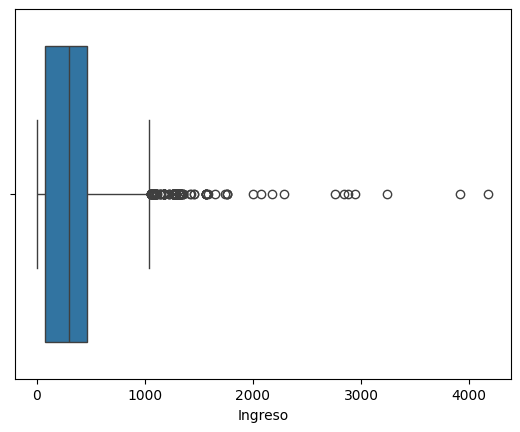

In [225]:
sns.boxplot(data=df, x="Ingreso")

<Axes: xlabel='Ingreso', ylabel='Count'>

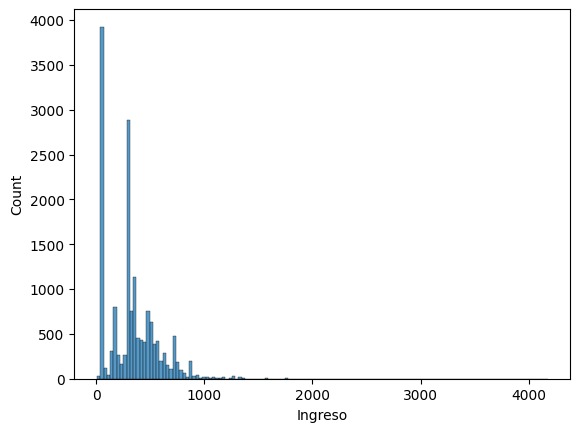

In [226]:
sns.histplot(data=df, x="Ingreso")

## f. ¿Qué día del mes tuvo más ingresos? (Use la variable Ingreso)

---



In [247]:
mes = 10
anio = 2021

df['Fecha_completa'] = pd.to_datetime(df['Dia'].astype(str) + '/' + str(mes) + '/' + str(anio), format = '%d/%m/%Y')
df['Nombre_dia'] = df['Fecha_completa'].dt.day_name()



,Periodo,Dia,EquipoSim,Tipo,Subtipo,Marca,Gama,Ingreso,Costo,Margen,Rentabilidad,Tipo Venta,CanalVenta,CadenaDealer,Departamento,Canal,SubCanal,Cluster,Fecha_completa,Nombre_dia
0,202110,13,Equipo,Celular,Smartphone,ZTE,1. Low,173.03390,192.39,-19.36,-10.06,Porta,GRANDES TIENDAS,TOTTUS,LIMA,Retail,GRANDES TIENDAS,Cluster A,2021-10-13,Wednesday
1,202110,27,Equipo,Celular,Smartphone,Samsung,2. Entry Smart,355.22030,338.88,16.34,4.82,VR,GRANDES TIENDAS,PLAZAVEA,JUNIN,Retail,GRANDES TIENDAS,Cluster B,2021-10-27,Wednesday
2,202110,21,Equipo,Celular,Smartphone,Xiaomi,3. Mid,725.38980,769.94,-44.55,-5.79,Porta,GRANDES TIENDAS,OECHSLE,LAMBAYEQUE,Retail,GRANDES TIENDAS,Cluster B,2021-10-21,Thursday
3,202110,17,Equipo,Celular,Smartphone,Bmobile,1. Low,56.23729,35.41,20.83,58.83,VR,GRANDES TIENDAS,PLAZAVEA,ICA,Retail,GRANDES TIENDAS,Cluster A,2021-10-17,Sunday
4,202110,26,Equipo,Celular,Smartphone,Bmobile,1. Low,49.70339,34.85,14.85,42.61,Porta,GRANDES TIENDAS,METRO,LIMA,Retail,GRANDES TIENDAS,Cluster A,2021-10-26,Tuesday


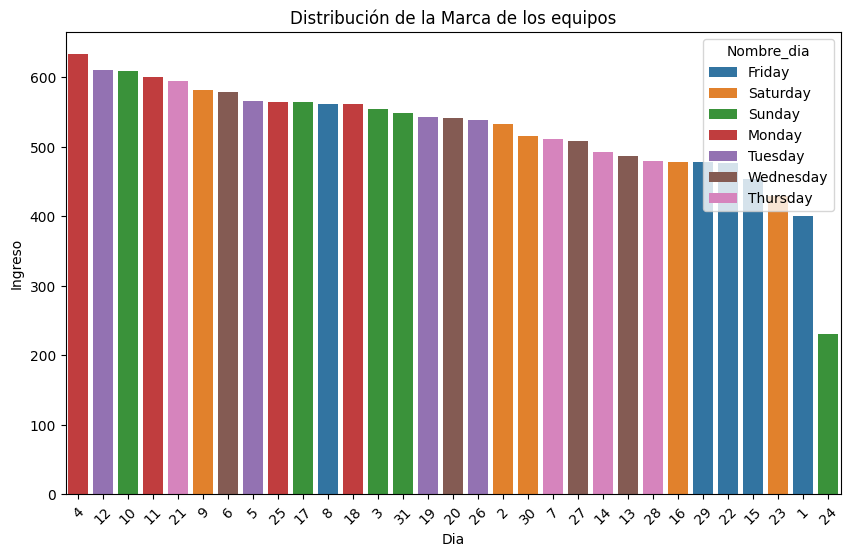

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dia', order=df['Dia'].value_counts().index, hue="Nombre_dia")
plt.title('Distribución ingresos durante los días del mes')
plt.xlabel('Dia')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

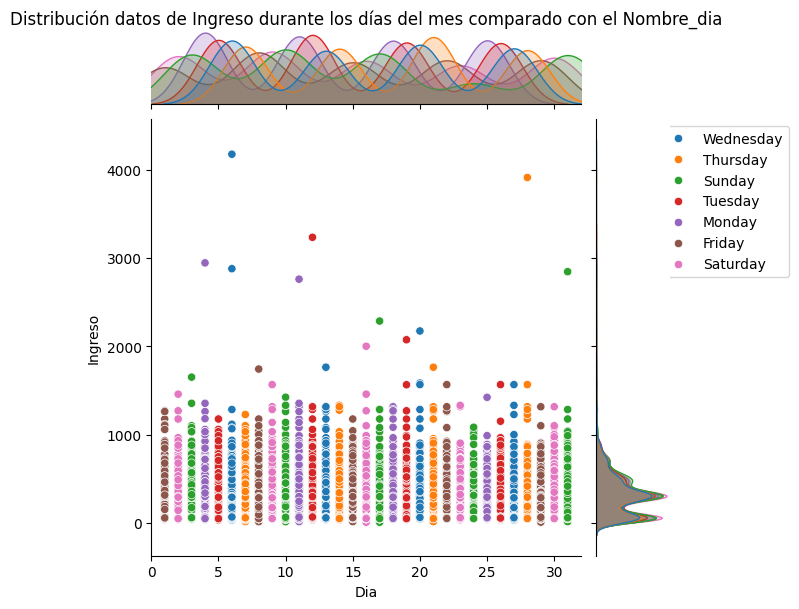

In [252]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df,x='Dia',y='Ingreso',hue='Nombre_dia')
plt.title('Distribución datos de Ingreso durante los días del mes comparado con el Nombre_dia', x=0.5, y=1.2)
plt.xlim(0,32)
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

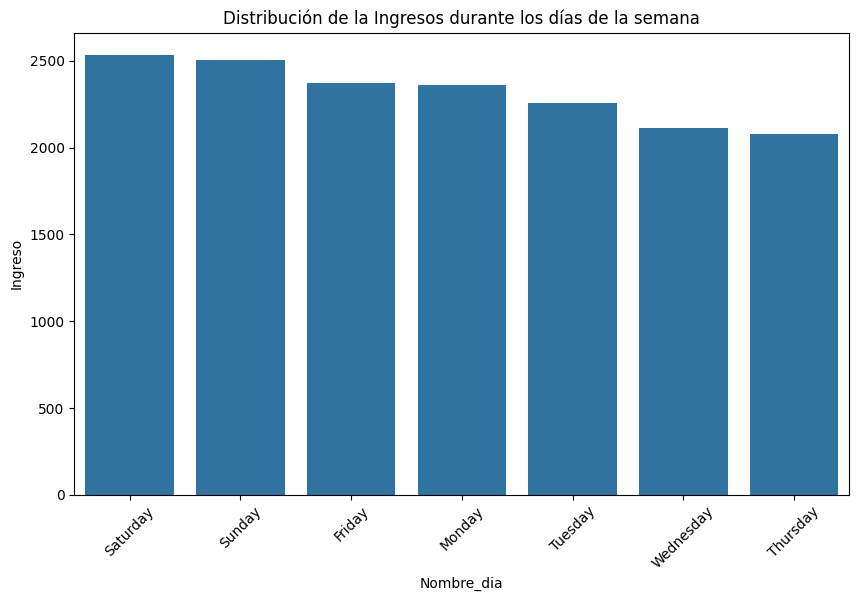

In [259]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Nombre_dia', order=df['Nombre_dia'].value_counts().index)
plt.title('Distribución de la Ingresos durante los días de la semana')
plt.xlabel('Nombre_dia')
plt.ylabel('Ingreso')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

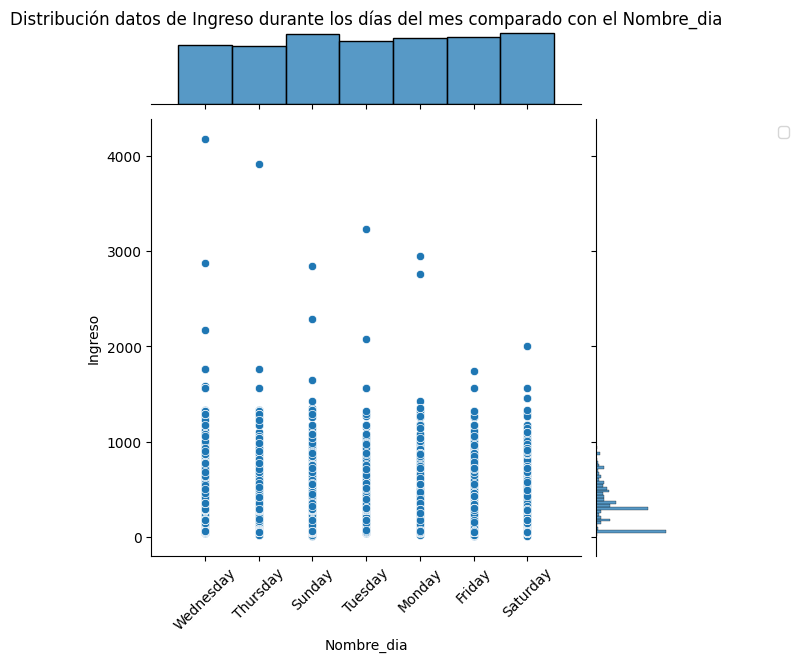

In [263]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=df,x='Nombre_dia',y='Ingreso')
plt.title('Distribución datos de Ingreso durante los días del mes comparado con el Nombre_dia', x=0.5, y=1.2)
plt.xlim(-1,7)
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.xticks(rotation=45)
plt.show()

In [258]:
dia = df.groupby('Nombre_dia')['Nombre_dia'].count()

dia.sort_values(ascending=False)
print('Los días con mayores ingresos del mes, fueron:',dia.idxmax())
print('Con un total de:',dia.max())

El día del mes con mayor ingreso fue: Saturday
Con un total de: 2535


## g. Realice un boxplot de la variable Costo y explíquelo a detalle indicando el Promedio Máximo, Mínimo y Desviación estándar. Aplique la librería seaborn y separelo por gama

In [241]:
telefonia_l=df[['Costo']]
x=telefonia_l
x.head()

,Costo
0,192.39
1,338.88
2,769.94
3,35.41
4,34.85


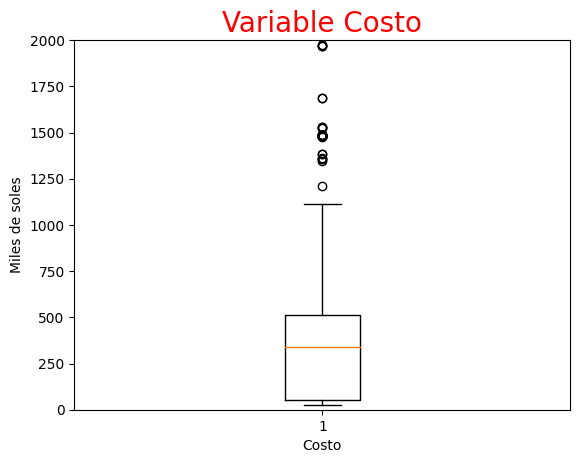

In [242]:
#Grafico de BoxPlot

plt.boxplot(x)
plt.title('Variable Costo', size=20, color='red')
plt.xlabel('Costo')
plt.ylabel('Miles de soles')

plt.ylim(0,2000)
plt.show()


In [243]:
#Desviacion Standar:
print("Desviacion estandar")
sd =np.std(x)
print("sd: ",sd,"\n")
#Promedio:
prom = np.mean(x)
print("prom: ",prom,"\n")
#Numero maximo
max = np.max(x)
print("Max: ",max,"\n")

#Numero minimo
min = np.min(x)
print("Min: ",min,"\n")

Desviacion estandar
sd:  Costo    254.183955
dtype: float64 

prom:  345.84619741507925 

Max:  4271.58 

Min:  27.97 



## h. Haga un gráfico de correlación entre los ingresos y el Margen, utilice la librería seaborn para poder utilizar hue=Marca

In [244]:
df['Margen']

0        -19.36
1         16.34
2        -44.55
3         20.83
4         14.85
          ...  
19547     31.64
19548    -28.08
19549    -51.36
19550   -106.66
19551    -39.14
Name: Margen, Length: 16221, dtype: float64

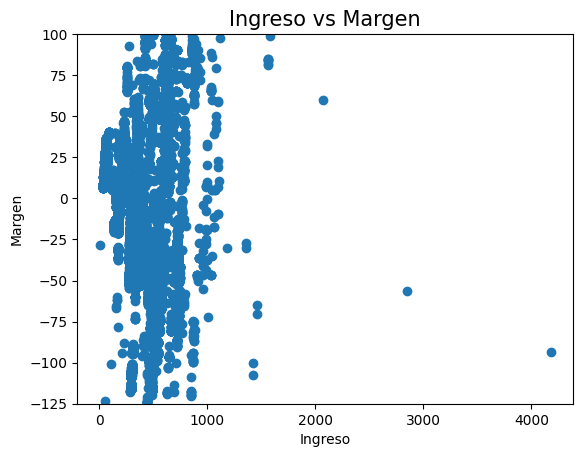

In [245]:
plt.scatter(df["Ingreso"],df["Margen"])
plt.xlabel("Ingreso")
plt.ylabel("Margen")
plt.title('Ingreso vs Margen', size=15, color='black')
plt.ylim(-125,100
         )

plt.show()

<Figure size 600x400 with 0 Axes>

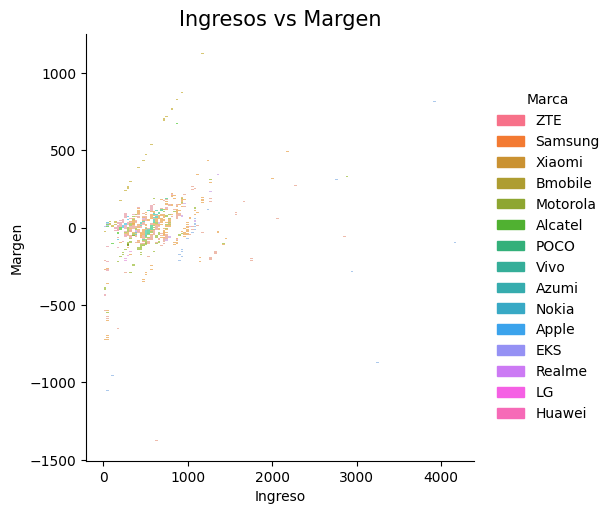

In [233]:
#Grafico de correlacion:
plt.figure(figsize=(6,4))
sns.displot(
    data=df,
    x='Ingreso',
    y='Margen',
    hue='Marca')
plt.title('Ingresos vs Margen', size=15, color='black')
plt.show()

# **Conclusiones**

1. La base de datos pasó de 19.552 observaciones a 16.221 debido principalmente a la presencia de una fila con su totalidad de valores nulos, y en algunos otros se requirió eliminar filas de algunos, dado que no se contaba con un criterio que diera soporte a la justificación de estos valores nulos, así como su posible reemplazo.


2. Desde el inicio con las estadísticas descriptivas es posible observar datos que no son comunes, por ejemplo, en la variable Ingreso un valor de 7,1, con una mediana de 298,3 y una media de 327,8, pero con un valor máximo en 4.177,9 lo cual es aproximadamente 9 veces el valor encontrado en el cuartil 3, algo similar ocurre con la variable Costo. Para análisis futuros o el planteamiento de modelos, se requeriría hacer tratamiento de datos extremos y trabajar con datos más adecuados en cuanto a sus pesos, porque si bien, los datos extremos hacen que la variable Ingreso (por ejemplo), tenga una distribución poco común en su histograma.

3. Fue posible observar que la Gama de los dispositivos se agrupaba en sus diferentes categorías cuando se veía la dispersión de Ingreso vs Costo, pero que al hacerlo cuando la dispersión fue de Margen vs Rentabilidad, no se podía apreciar dicha diferencia, sin embargo, pareciera que la Gama 1. Low fuera la que mayor rentabilidad tuviera, al igual que con sus Ingreso vs Costo.

4. En cuanto a la relación Costo/Ingreso, dispositivos de la marca Apple son quienes presentaron mayor relación, mientras que los de la marca Bmobile tuvieron en algunos casos menor Costo y mayor Ingreso, comparados con la mayoría, llegando a su vez a ser la marca que presenta mayor Rentabilidad y Margen.

5. Si bien se notó una evidencia marcada en los gráficos revisados en cuanto a la variable Departamento, se debe a que, más del 50% de los datos correspondían a este departamento, por lo cual, en análisis posteriores se recomendaría trabajar con grupos similares, ya que hay Departamentos con un dígito, mientras que en el caso de Lima posee 8.385 seguido de Piura y La Libertad, con 1.318 y 1.053, respectivamente.

6. Se encontró relación entre las variables Costo e Ingreso, y entre las variables Margen y Rentabilidad, aunque para el planteamiento de modelos a futuro y planes de negocio, sería conveniente analizar en conjunto variables categóricas junto con numéricas. Ya que por ejemplo, en los análisis separados que se realizaron, también se encontró que pareciera haber una alta relación entre dispositivos de la marca Bmobile de la Gama 1. Low, seguido por la marca Motorola en la Gama 2. Entry Smart, o Samsung en la Gama 3. Mid. Pero no se encontró alguna relación en la Gama 5. Premium por Marca o Departamento.

7. Si bien, el día con mayor ventas fue el 4 de octubre del 2021, hay que resaltar la ventana del 9 al 12, 4 de los 6 días con mas Ingresos estuvieron estos días, por lo que se podría suponer o indagar el hecho en sí, posiblemente una campaña, promoción, u otro tipo de actividad económica (pago de honorarios por ejemplo) que hicieron posible este suceso y que se podría tener en cuenta para “eventos futuros”.
